### Part 1: Data Collection

**To build a customised chatbot, we will need to collect data from the relevant websites which will form the contextual knowledge for any Large Language Model to run.** 

**To do so, we will look at the sitemap of MOM's website to identify which are the relevant web pages that we will need to collect.**

![Sitemap of MOM website](../images/sitemap_MOM.png)

Our interest lies on finding eligibility criteria for employment pass. We will need to filter out the required urls from all the web links that we have extracted. 

In [1]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [2]:
URL = "https://www.mom.gov.sg/sitemap"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
all_href = soup.find_all('a')

all_web_links = [link['href'] for link in all_href] 

**Looking at the sitemap, there is some form of hierarchy, we will therefore need to filter based on:**

**1) Passes and permits**

**2) Employment Pass**

**3) Eligibility**

In [3]:
import re

required_links = []

for i in range(len(all_web_links)):
    if re.findall(r'/passes-and-permits/employment-pass/eligibility*', str(all_web_links[i])) != []:
        required_links.append(all_web_links[i])

In [4]:
full_links = []
for link in required_links:
    full_link = 'https://www.mom.gov.sg' + str(link)
    full_links.append(full_link)

In [5]:
full_links # There are only 4 main url links that we need to extract.

['https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility/compass-c1-salary-benchmarks',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility/compass-c5-skills-bonus-shortage-occupation-list-sol',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility/compass-c6-strategic-economic-priorities-sep-bonus-eligible-programmes']

**We need to extract relevant url links in the subpages too, to do so, we will write a for loop to get all the urls in each of the 4 main pages and append them together into a list.**

In [16]:
all_sublinks = []

for k in range(len(full_links)):
    sub_URL = full_links[k]
    sub_page = requests.get(sub_URL)
    sub_soup = BeautifulSoup(sub_page.content, "html.parser")
    all_sub_href = sub_soup.find_all('a', href=True)

    all_sub_web_links = [each_link['href'] for each_link in all_sub_href] 
    
    for j in range(len(all_sub_web_links)):
            all_sublinks.append(all_sub_web_links[j])

In [18]:
sorted(all_sublinks)

['#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#MainContent',
 '#MainContent',
 '#MainContent',
 '#MainContent',
 '#SearchMOM',
 '#SearchMOM',
 '#SearchMOM',
 '#SearchMOM',
 '#c3-diversity',
 '#c3-diversity',
 '#c4-support-for-local-employment',
 '#c4-support-for-local-employment',
 '#compass',
 '#compass',
 '#compass',
 '#compass-case-studies',
 '#compass-tools-and-resources',
 '#criteria-details',
 '#ep-qualifying-salary',
 '#ep-qualifying-salary',
 '#ep-qualifying-salary',
 '#ep-qualifying-salary',
 '#exemptions-from-compass',
 '#exemptions-from-compass',
 '#primary-navigat

**Based on the all the url links that we have extracted, not all are relevant to our context of extracting information related to eligibility of employment pass.** 

**We will need those urls that begins with "/" and are of length that are longer than 30.** 

**For instance, '/passes-and-permits/employment-pass' has 35 characters and such links will be what we need for our data collection.**

**On the other hand, '/newsroom' only has 9 characters and we do not need it for the purpose of this project.**

**In addition, links that do not begin with "/", i.e., 'https://www.linkedin.com/company/ministry-of-manpower/' should also be omitted in our data collection.**

In [19]:
#This for loop will get all the sub_urls of our interest.

required_sublinks = []

for k in range(len(full_links)):
    sub_URL = full_links[k]
    sub_page = requests.get(sub_URL)
    sub_soup = BeautifulSoup(sub_page.content, "html.parser")
    all_sub_href = sub_soup.find_all('a', href=True)

    all_sub_web_links = [each_link['href'] for each_link in all_sub_href] 
    
    for j in range(len(all_sub_web_links)):
        if  (all_sub_web_links[j].split("/")[0] == "") & (len(all_sub_web_links[j]) > 30): # this is to retrieve all relevant webpages URL.
            mylink = 'https://www.mom.gov.sg' + str(all_sub_web_links[j])
            required_sublinks.append(mylink)

In [20]:
required_sublinks

['https://www.mom.gov.sg/passes-and-permits/employment-pass',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/eligibility',
 'https://www.mom.gov.sg/faq/compass/how-does-compass-calculate-my-organisation-local-pmet-share-relative-to-my-organisation-sector#local-pmet',
 'https://www.mom.gov.sg/faq/compass/how-are-pmets-counted-under-the-diversity-and-support-for-local-employment-criteria-for-compass',
 'https://www.mom.gov.sg/eservices/services/employment-s-pass-self-assessment-tool',
 'https://www.mom.gov.sg/passes-and-permits/employment-pass/consider-all-candidates-fairly',
 'https://www.mom.gov.sg/covid-19-vaccination-requirements-for-mom-passes',
 'https://www.mom.gov.sg/faq/employment-pass/how-do-i-know-if-my-company-is-considered-part-of-the-financial-services-sector',
 'https://www.mom.gov.sg/faq/entrepass/what-is-the-techsg-programme',
 'https://www.mom.gov.sg/faq/compass/how-does-compass-calculate-my-orga

In [21]:
# As there could be similar links that are extracted more than once from the 4 main pages that we have identified 
# earlier, we will look for unique URLs.

unique_sublinks = set(required_sublinks)
unique_sublinks_list = list(unique_sublinks)

In [22]:
len(unique_sublinks_list)

53

In [37]:
sorted_sublinks = sorted(unique_sublinks_list)

In [38]:
sorted_sublinks

['https://www.mom.gov.sg/-/media/mom/documents/press-releases/2023/annex-c---eligible-programmes-for-sep-bonus.pdf',
 'https://www.mom.gov.sg/-/media/mom/documents/work-passes-and-permits/compass/c1-salary-benchmarks.pdf',
 'https://www.mom.gov.sg/-/media/mom/documents/work-passes-and-permits/compass/compass-booklet.pdf',
 'https://www.mom.gov.sg/-/media/mom/documents/work-passes-and-permits/compass/compass-c2-list-of-degree-equivalent-qualifications.pdf',
 'https://www.mom.gov.sg/-/media/mom/documents/work-passes-and-permits/compass/compass-c2-list-of-top-tier-institutions.pdf',
 'https://www.mom.gov.sg/-/media/mom/documents/work-passes-and-permits/compass/mom-compass-infographic-final.pdf',
 'https://www.mom.gov.sg/-/media/mom/documents/work-passes-and-permits/compass/sol-guidebook.pdf',
 'https://www.mom.gov.sg/covid-19-vaccination-requirements-for-mom-passes',
 'https://www.mom.gov.sg/eservices/services/employment-s-pass-self-assessment-tool',
 'https://www.mom.gov.sg/eservices/ser

**We noticed that there are both html and pdf files in our urls. We will need to separate them in our data collection by saving them into their respective extensions (i.e., .pdf, .html).**

In [23]:
sublinks_with_pdf = [link for link in unique_sublinks_list if re.search('.pdf',link)]

In [24]:
sublinks_with_html = [link for link in unique_sublinks_list if re.search('.pdf',link) == None]

In [25]:
import urllib.request

# This is to store html files.

for i in range(len(sublinks_with_html)):
    name = "../data/doc_"+ str(i) + ".html"
    urllib.request.urlretrieve(sublinks_with_html[i], name) 

In [26]:
# This is to store pdf files. 

for i in range(len(sublinks_with_pdf)):
    name = "../data/pdfdoc_"+ str(i) + ".pdf"
    urllib.request.urlretrieve(sublinks_with_pdf[i], name)

### 02 Visualisation of the extracted data

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, '46'), Text(0, 0, '7')]

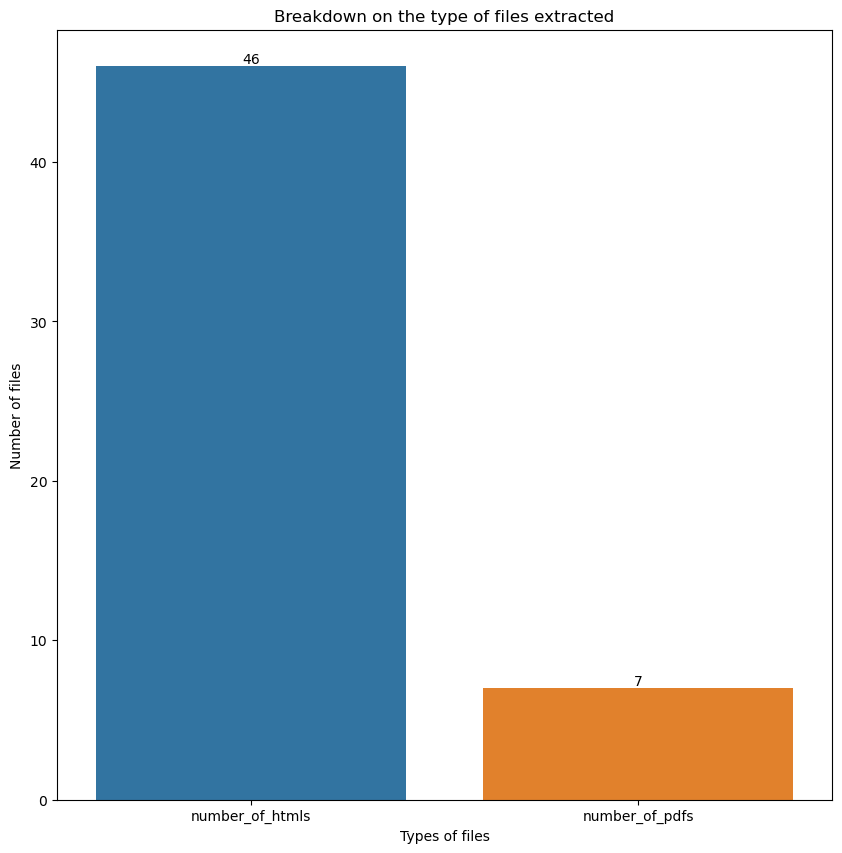

In [28]:
# This is to visualise the number of htmls vs pdf files that we have extracted.

extracted_data = {"number_of_htmls":len(sublinks_with_html), "number_of_pdfs":len(sublinks_with_pdf)}
extracted_stats_df = pd.DataFrame(list(extracted_data.items()),columns = ['type_of_files','num'])

plt.figure(figsize=(10,10))
ax = sns.barplot(extracted_stats_df, x="type_of_files", y="num")
plt.title("Breakdown on the type of files extracted")
plt.xlabel("Types of files")
plt.ylabel("Number of files")
plt.bar_label(ax.containers[0])

**Based on the above visualisation, we can see that there are 46 html files extracted, significantly more than the number of pdfs which is 7.**

**In total, we have extracted 46 + 7 = 53 files which will be used as context for our chatbot.**

In [30]:
import PyPDF2

num_of_pages_pdf = []
names_of_pdf = []

for index in range(len(sublinks_with_pdf)):
    filename = "../data/pdfdoc_"+ str(index) + ".pdf"
    file = open(filename, 'rb') 
    pdfReader = PyPDF2.PdfReader(file)
    total_pages = len(pdfReader.pages)
    name = "pdfdoc_" + str(index)
    names_of_pdf.append(name)
    num_of_pages_pdf.append(total_pages)
    
pdf_data_info = dict(zip(names_of_pdf, num_of_pages_pdf))
pdf_stats_df = pd.DataFrame(list(pdf_data_info.items()),columns = ['name_of_pdf','num_of_pages'])

[Text(0, 0, '1'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '5'),
 Text(0, 0, '44'),
 Text(0, 0, '11'),
 Text(0, 0, '3')]

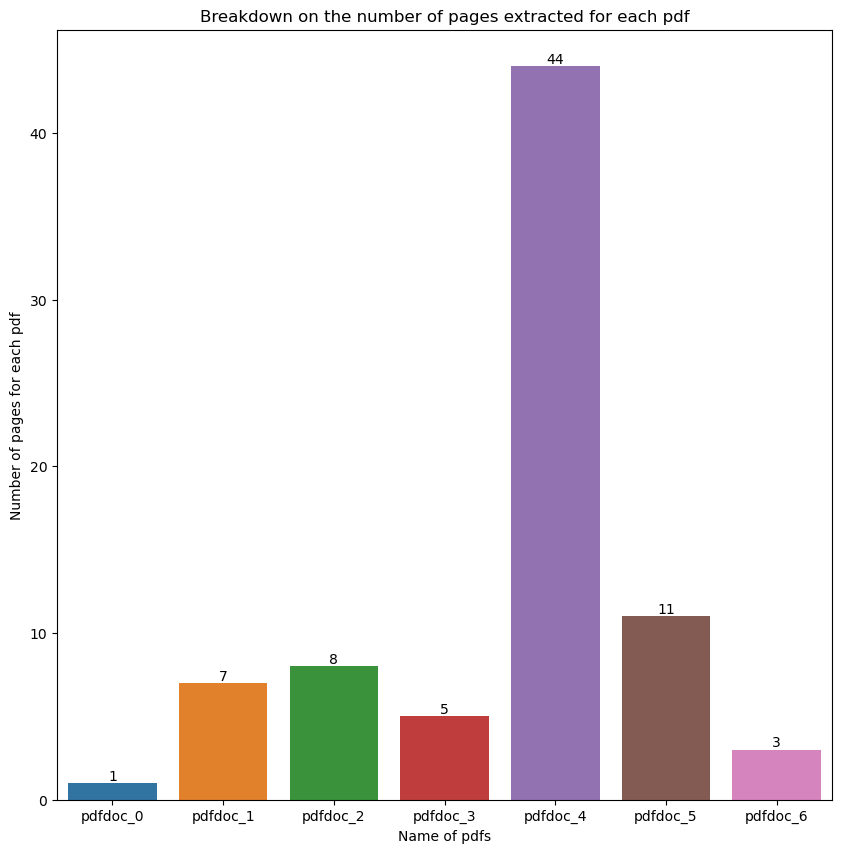

In [31]:
plt.figure(figsize=(10,10))
ax = sns.barplot(pdf_stats_df, x="name_of_pdf", y="num_of_pages")
plt.title("Breakdown on the number of pages extracted for each pdf")
plt.xlabel("Name of pdfs")
plt.ylabel("Number of pages for each pdf")
plt.bar_label(ax.containers[0])

**Based on the visualisation above, we can see that pdfdoc_4 has significantly more number of pages compared to the others. Upon closer inspection on pdfdoc_4, we can see that it is made up of many tables that shows the breakdown of the salary benchmarks by the sectors, and for each sector it is broken down to the age category.** 

**This explains why this particular pdf file has a much higher number of pages compared to the rest.**

![Screenshot of pdfdoc_4](../images/pdfdoc_4_screenshot.png)

In [34]:
num_of_readlines_html = []
names_of_html = []

for index in range(len(sublinks_with_html)):
    filename = "../data/doc_"+ str(index) + ".html"
    file = open(filename, 'rb') 
    total_pages = len(file.readlines())
    name = "doc_" + str(index)
    names_of_html.append(name)
    num_of_readlines_html.append(total_pages)
    
html_data_info = dict(zip(names_of_html, num_of_readlines_html))
html_stats_df = pd.DataFrame(list(html_data_info.items()),columns = ['name_of_html','num_of_readlines'])

[Text(0, 0, '775'),
 Text(0, 0, '771'),
 Text(0, 0, '508'),
 Text(0, 0, '864'),
 Text(0, 0, '514'),
 Text(0, 0, '648'),
 Text(0, 0, '508'),
 Text(0, 0, '723'),
 Text(0, 0, '1389'),
 Text(0, 0, '639'),
 Text(0, 0, '919'),
 Text(0, 0, '788'),
 Text(0, 0, '3429'),
 Text(0, 0, '498'),
 Text(0, 0, '496'),
 Text(0, 0, '631'),
 Text(0, 0, '631'),
 Text(0, 0, '524'),
 Text(0, 0, '1389'),
 Text(0, 0, '504'),
 Text(0, 0, '640'),
 Text(0, 0, '919'),
 Text(0, 0, '1389'),
 Text(0, 0, '1389'),
 Text(0, 0, '531'),
 Text(0, 0, '564'),
 Text(0, 0, '507'),
 Text(0, 0, '625'),
 Text(0, 0, '1886'),
 Text(0, 0, '559'),
 Text(0, 0, '669'),
 Text(0, 0, '497'),
 Text(0, 0, '509'),
 Text(0, 0, '499'),
 Text(0, 0, '658'),
 Text(0, 0, '504'),
 Text(0, 0, '628'),
 Text(0, 0, '559'),
 Text(0, 0, '496'),
 Text(0, 0, '1389'),
 Text(0, 0, '1389'),
 Text(0, 0, '639'),
 Text(0, 0, '497'),
 Text(0, 0, '799'),
 Text(0, 0, '651'),
 Text(0, 0, '926')]

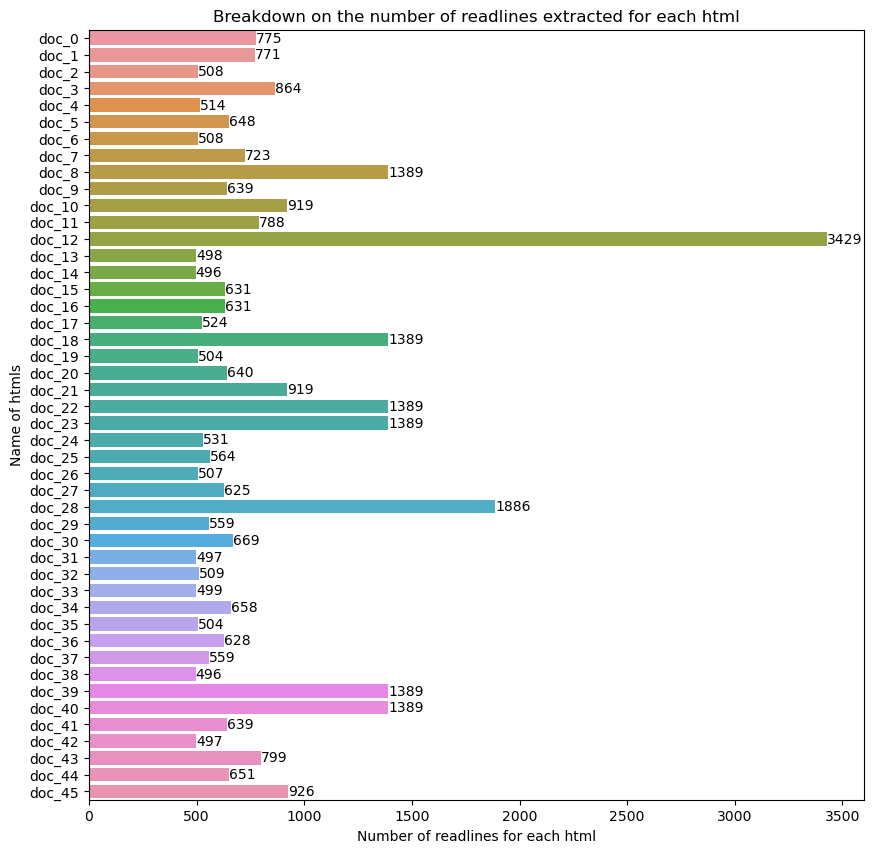

In [35]:
plt.figure(figsize=(10,10))
ax = sns.barplot(html_stats_df, y="name_of_html", x="num_of_readlines")
plt.title("Breakdown on the number of readlines extracted for each html")
plt.xlabel("Number of readlines for each html")
plt.ylabel("Name of htmls")
plt.bar_label(ax.containers[0])

In [39]:
html_stats_df.describe()

,num_of_readlines
count,46.000000
mean,814.478261
std,515.641854
min,496.000000
25%,510.250000
50%,639.000000
75%,847.750000
max,3429.000000


**Based on the above visualisation and descriptive stats, we can see that on average, the mean number of readlines is around 815 per webpage. However, there are exceptions such as doc_12 and doc_28 which had more than twice the mean number of readlines.**

**Doc_12 is on the salary criterion, similar to pdfdoc_4 which included information on the various sectors and its respective salaries by age to be awarded points under the Complementarity Assessment Framework (COMPASS).**

**Doc_28 is on the skills bonus criterion, which included a breakdown by sectors and the eligible job titles to be awarded points under COMPASS.** 

**We can see that webpages that included a breakdown by sectors generally have longer content based on what we have extracted.**

[Click here for creation of chatbot](02_Creation_of_chatbot.ipynb)